In [1]:
# %%
import pandas as pd
import numpy as np
from plotnine import (
    ggplot, aes, geom_tile, geom_vline, geom_violin,
    scale_fill_cmap, theme_bw, theme, element_text, labs
)
import pickle
import os

print("Libraries imported successfully.")

Libraries imported successfully.


In [2]:
# %%
# Load HIGH and LOW saliency arrays from pickle

main_dir = "/gpfs/commons/home/atalukder/Contrastive_Learning"
sal_dir = f"{main_dir}/data/extra/contrast_saliency_random/f__2025_11_19__13_37_51/"

pkl_path = f"{sal_dir}/pickles/full_saliency_means__2025_11_19__14_23_23.pkl"   # <-- change if needed

with open(pkl_path, "rb") as f:
    data = pickle.load(f)

HIGH = data["HIGH_full_mean"][100:700]
LOW  = data["LOW_full_mean"][100:700]

print(f"HIGH shape: {len(HIGH)}, LOW shape: {len(LOW)}")

HIGH shape: 600, LOW shape: 600


In [17]:
# %%
# Build long-format DataFrame for plotnine

L = len(HIGH)
pos = np.arange(L)+1

df = pd.DataFrame({
    "pos": np.concatenate([pos, pos]),
    "saliency": np.concatenate([HIGH, LOW]),
    "group": ["HIGH"] * L + ["LOW"] * L,
})

df.head()

# %%
# Configure canonical splice site boundaries
five_prime_ss = 300
three_prime_ss = 500




# # print("Splice sites set to:", five_prime_ss, three_prime_ss)
# L = len(HIGH)
# raw_pos = np.arange(L)

# pos = np.where(raw_pos < 300,
#                raw_pos + 1,   # shift only left part
#                raw_pos       # keep right part
# )

# df = pd.DataFrame({
#     "pos": np.concatenate([pos, pos]),
#     "saliency": np.concatenate([HIGH, LOW]),
#     "group": ["HIGH"] * L + ["LOW"] * L,
# })


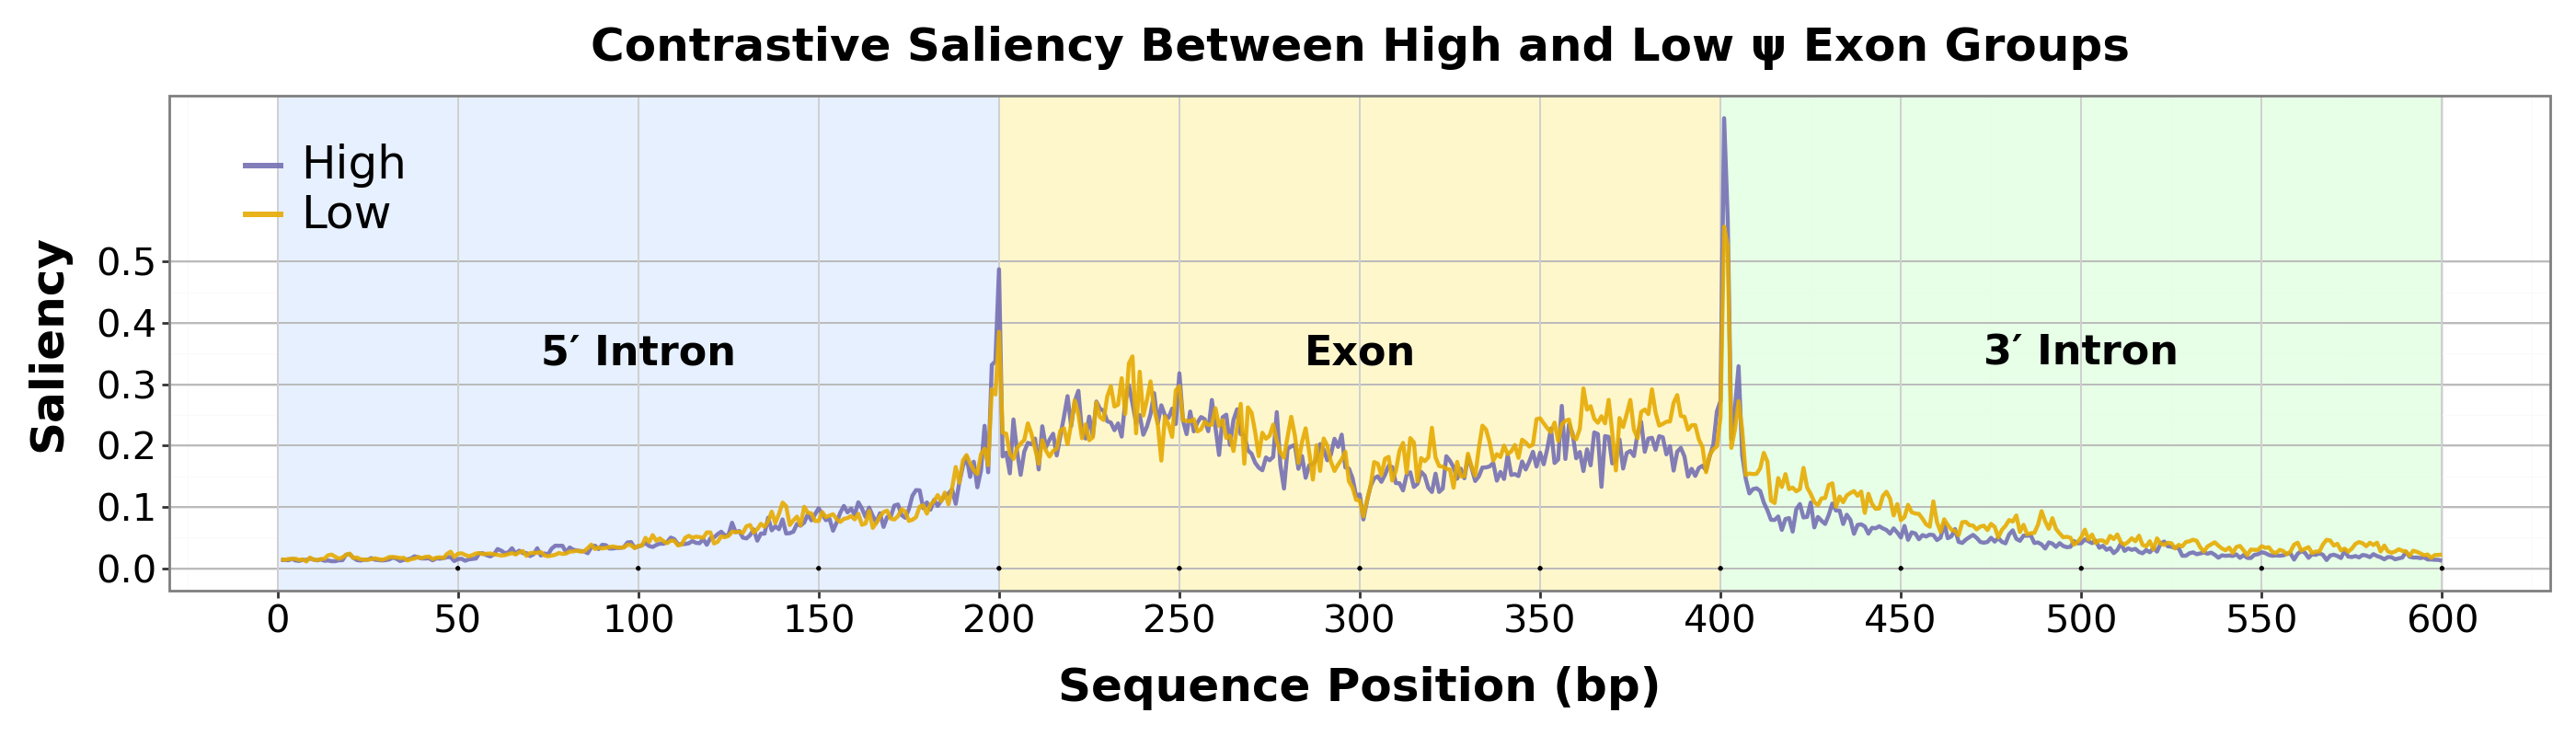

✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/fig_TissueWise_ASCOT_hilow_Saliency_20251119_161208.png
✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/fig_TissueWise_ASCOT_hilow_Saliency_20251119_161208.svg


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/fig_TissueWise_ASCOT_hilow_Saliency_20251119_161208.pdf
✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/fig_TissueWise_ASCOT_hilow_Saliency_20251119_161208.eps


In [62]:
from plotnine import *
import numpy as np
import time

# Define region boundaries
intron5_end = 200
exon_end    = 400
max_pos     = 600

# Define ticks
xticks = list(range(0, max_pos+1, 50))
yticks = [round(v,2) for v in np.arange(0, 0.6, 0.1)]

# rename for safety
df = df.rename(columns={"group": "Group"})
label_map = {'HIGH': 'High', 'LOW': 'Low'}
df['Group_label'] = df['Group'].map(label_map)

p_line = (
    ggplot(df, aes("pos", "saliency", color="Group_label"))

    # --- background ---
    + geom_rect(aes(xmin=0, xmax=intron5_end, ymin=-np.inf, ymax=np.inf),
                fill="#e6f0ff", alpha=0.7, inherit_aes=False)
    + geom_rect(aes(xmin=intron5_end, xmax=exon_end, ymin=-np.inf, ymax=np.inf),
                fill="#fff7cc", alpha=0.7, inherit_aes=False)
    + geom_rect(aes(xmin=exon_end, xmax=max_pos, ymin=-np.inf, ymax=np.inf),
                fill="#e6ffe6", alpha=0.7, inherit_aes=False)

    # --- STRONGER GRIDLINES (darker, visible) ---
    + geom_hline(yintercept=yticks, color="#bbbbbb", size=0.4)
    + geom_vline(xintercept=xticks, color="#d0d0d0", size=0.4)

    # --- ensures x-ticks appear (on top) ---
    + geom_point(
    data=df[df.pos.isin(xticks)],
    mapping=aes(x="pos", y=0),
    color="black",
    size=0.01,
    inherit_aes=False
)


    + geom_line(size=0.9, alpha=0.9)

    # + geom_vline(xintercept=200, linetype="dashed", color="gray")
    # + geom_vline(xintercept=400, linetype="dashed", color="gray")
    # + annotate("text", x=100, y=0.35, label="5′ Intron", ha="center", size=16, weight="bold")
    # + annotate("text", x=300, y=0.35, label="Exon", ha="center", size=16, weight="bold")
    # + annotate("text", x=500, y=0.35, label="3′ Intron", ha="center", size=16, weight="bold")
    + annotate("text", x=100, y=0.35, label="5′ Intron",
           ha="center", size=16, fontweight="bold")

    + annotate("text", x=300, y=0.35, label="Exon",
            ha="center", size=16, fontweight="bold")

    + annotate("text", x=500, y=0.35, label="3′ Intron",
           ha="center", size=16, fontweight="bold")


    + scale_x_continuous(breaks=xticks, limits=(0, max_pos))
    + scale_y_continuous(breaks=yticks)

    + scale_color_manual(
        name=None,
        values={"High": "#7570b3", "Low": "#e6ab02"}
    )

    + theme_bw()
    + theme(
        figure_size=(14, 4),

        legend_position=(0.03, 0.97),
        legend_justification=(0,1),
        legend_background=element_rect(fill="none", color="none"),
        legend_key=element_rect(fill="none", color="none"),
        legend_title=None,
        legend_text=element_text(size=18),

        axis_title=element_text(size=18, weight="bold"),
        axis_text=element_text(size=15, color="black"),  # darker ticks
        plot_title=element_text(size=18, weight="bold", ha="center"),

        # remove default grid
        panel_border=None,
        panel_grid_major=None,
        panel_grid_minor=None,
    )

    + labs(
        title="Contrastive Saliency Between High and Low ψ Exon Groups",
        x="Sequence Position (bp)",
        y="Saliency"
    )
    + guides(color=guide_legend(title=""))
)

p_line.show()

out_path = f"/gpfs/commons/home/atalukder/Contrastive_Learning/files/RECOMB_26/figures/fig_TissueWise_ASCOT_hilow_Saliency_{time.strftime('%Y%m%d_%H%M%S')}"

    
# --- Draw and save with consistent size ---
fig = p_line.draw()

# Force the figure to match notebook display ratio
fig.set_size_inches(14, 4)  # same as theme figure_size

formats = ['png', 'svg', 'pdf', 'eps']
for fmt in formats:
    save_path = f"{out_path}.{fmt}"
    fig.savefig(
    save_path,
    dpi=300,
    bbox_inches="tight",
    facecolor="white"
    )
    print(f"✅ Saved: {save_path}")




In [66]:
import matplotlib.pyplot as plt

def apply_logo_theme():
    ax = plt.gca()

    # Figure size
    plt.gcf().set_size_inches(6, 2)

    # Title
    ax.title.set_fontsize(18)
    ax.title.set_weight("bold")

    # Axis titles
    ax.xaxis.label.set_fontsize(18)
    ax.xaxis.label.set_weight("bold")
    ax.yaxis.label.set_fontsize(18)
    ax.yaxis.label.set_weight("bold")
    ax.set_xlabel("Sequence Position (bp)", fontsize=14, weight="bold")
    ax.set_ylabel("Info (bits)", fontsize=14, weight="bold")


    # Axis ticks
    ax.tick_params(axis='both', which='major', labelsize=15, colors='black')

    # # Axis ticks
    # ax.tick_params(axis='both', labelsize=12, colors="black")

    # Grid ON (horizontal only, like ggplot)
    ax.grid(True, axis='y', linestyle='--', linewidth=0.6, alpha=0.6)
    ax.grid(False, axis='x')

    # Restore border/spines on left & bottom only
    ax.spines['left'].set_visible(True)
    ax.spines['bottom'].set_visible(True)
    
    # Hide the top/right spines
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # Make border thicker
    ax.spines['left'].set_linewidth(1.2)
    ax.spines['bottom'].set_linewidth(1.2)

    # Remove grid + frame
    # ax.grid(False)
    # for spine in ax.spines.values():
    #     spine.set_visible(False)

    # Legend — Logomaker usually has no legend, but this is ready if you add one
    leg = ax.get_legend()
    if leg is not None:
        leg.set_frame_on(False)
        leg.get_title().set_fontsize(18)
        for txt in leg.get_texts():
            txt.set_fontsize(18)
        leg._legend_box.align = "left"
        leg.set_bbox_to_anchor((0.03, 0.97), transform=ax.transAxes)
        leg.set_title(None)

    


In [67]:
import logomaker
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



def make_logo_themed(list_of_seqs, fig_name, title, start, end):
    list_of_seqs = [s.upper() for s in list_of_seqs]

    # Information–content matrix
    df_counts = logomaker.alignment_to_matrix(list_of_seqs, to_type='information')

    # Plot
    plt.figure(figsize=(4,4))
    logomaker.Logo(df_counts)

    # X-tick labels
    window_len = end - start
    plt.xticks(
        ticks=np.arange(window_len),
        labels=np.arange(start, end)
    )

    # Title
    plt.title(title)

    # Apply theme
    apply_logo_theme()

    # ----- SAVE IN MULTIPLE FORMATS -----
    fig = plt.gcf()  # get current figure

    out_path = f"{sal_dir}/figures/{fig_name}"
    formats = ["png", "svg", "pdf", "eps"]

    for fmt in formats:
        save_path = f"{out_path}.{fmt}"
        fig.savefig(
            save_path,
            dpi=300,
            bbox_inches="tight",
            facecolor="white"
        )
        print(f"✅ Saved: {save_path}")

    plt.show()









Loaded keys: dict_keys(['HIGH_fullSeq', 'LOW_fullSeq', 'HIGH_left', 'LOW_left', 'HIGH_right', 'LOW_right', 'left_range', 'right_range'])
✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/data/extra/contrast_saliency_random/f__2025_11_19__13_37_51//figures/HIGH_left_logo.png
✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/data/extra/contrast_saliency_random/f__2025_11_19__13_37_51//figures/HIGH_left_logo.svg
✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/data/extra/contrast_saliency_random/f__2025_11_19__13_37_51//figures/HIGH_left_logo.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/data/extra/contrast_saliency_random/f__2025_11_19__13_37_51//figures/HIGH_left_logo.eps


<Figure size 400x400 with 0 Axes>

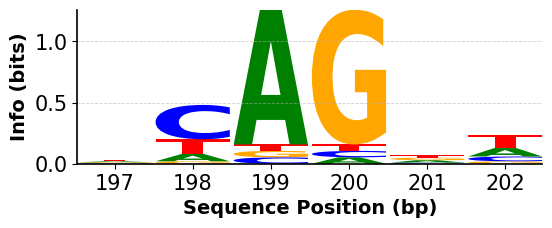

✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/data/extra/contrast_saliency_random/f__2025_11_19__13_37_51//figures/HIGH_right_logo.png
✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/data/extra/contrast_saliency_random/f__2025_11_19__13_37_51//figures/HIGH_right_logo.svg
✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/data/extra/contrast_saliency_random/f__2025_11_19__13_37_51//figures/HIGH_right_logo.pdf


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


✅ Saved: /gpfs/commons/home/atalukder/Contrastive_Learning/data/extra/contrast_saliency_random/f__2025_11_19__13_37_51//figures/HIGH_right_logo.eps


<Figure size 400x400 with 0 Axes>

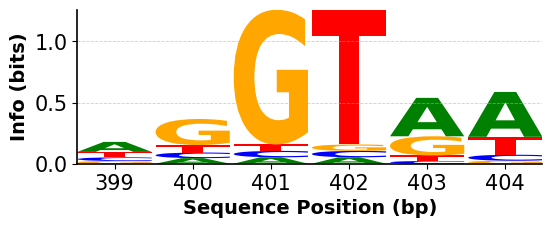

In [68]:
import pickle

pkl_path = f"{sal_dir}/pickles/motif_windows.pkl"   # <-- replace with your path

with open(pkl_path, "rb") as f:
    motif_data = pickle.load(f)

print("Loaded keys:", motif_data.keys())

left_start, left_end = motif_data["left_range"]
right_start, right_end = motif_data["right_range"]


make_logo_themed(
    motif_data["HIGH_left"],
    fig_name="HIGH_left_logo",
    title=None,
    start=left_start,
    end=left_end
)

# make_logo(
#     motif_data["LOW_left"],
#     fig_name="LOW_left_logo",
#     title="LOW: Left splice site",
#     start=left_start,
#     end=left_end
# )

make_logo_themed(
    motif_data["HIGH_right"],
    fig_name="HIGH_right_logo",
    title=None,
    start=right_start,
    end=right_end
)

# make_logo(
#     motif_data["LOW_right"],
#     fig_name="LOW_right_logo",
#     title="LOW: Right splice site",
#     start=right_start,
#     end=right_end
# )

In [33]:
import logomaker
import numpy as np
import matplotlib.pyplot as plt

def make_logo_frequency(list_of_seqs, fig_name, title, start, end):
    seqs = [s.upper() for s in list_of_seqs]

    # Count matrix
    count_df = logomaker.alignment_to_matrix(seqs, to_type='counts')

    # Convert to frequencies (rows sum to 1)
    freq_df = count_df.div(count_df.sum(axis=1), axis=0)

    # Plot
    plt.figure(figsize=(14, 4))
    logomaker.Logo(freq_df)

    # X-axis positions
    plt.xticks(
        ticks=np.arange(end - start),
        labels=np.arange(start, end)
    )
    plt.title(title)
    plt.xlabel("Genomic Position")
    plt.ylabel("Frequency")

    plt.tight_layout()
    plt.savefig(f"{sal_dir}/figures/{fig_name}.png", dpi=300)
    plt.show()


Loaded keys: dict_keys(['HIGH_fullSeq', 'LOW_fullSeq', 'HIGH_left', 'LOW_left', 'HIGH_right', 'LOW_right', 'left_range', 'right_range'])


<Figure size 1400x400 with 0 Axes>

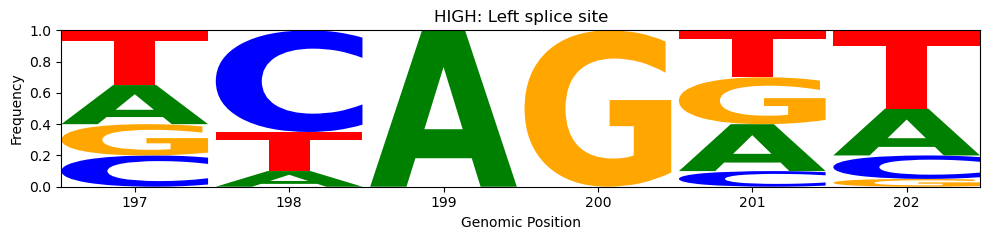

In [34]:
import pickle

pkl_path = f"{sal_dir}/pickles/motif_windows.pkl"   # <-- replace with your path

with open(pkl_path, "rb") as f:
    motif_data = pickle.load(f)

print("Loaded keys:", motif_data.keys())

left_start, left_end = motif_data["left_range"]
right_start, right_end = motif_data["right_range"]


make_logo_frequency(
    motif_data["HIGH_left"],
    fig_name="HIGH_left_logo",
    title="HIGH: Left splice site",
    start=left_start,
    end=left_end
)

# make_logo(
#     motif_data["LOW_left"],
#     fig_name="LOW_left_logo",
#     title="LOW: Left splice site",
#     start=left_start,
#     end=left_end
# )

# make_logo(
#     motif_data["HIGH_right"],
#     fig_name="HIGH_right_logo",
#     title="HIGH: Right splice site",
#     start=right_start,
#     end=right_end
# )

# make_logo(
#     motif_data["LOW_right"],
#     fig_name="LOW_right_logo",
#     title="LOW: Right splice site",
#     start=right_start,
#     end=right_end
# )

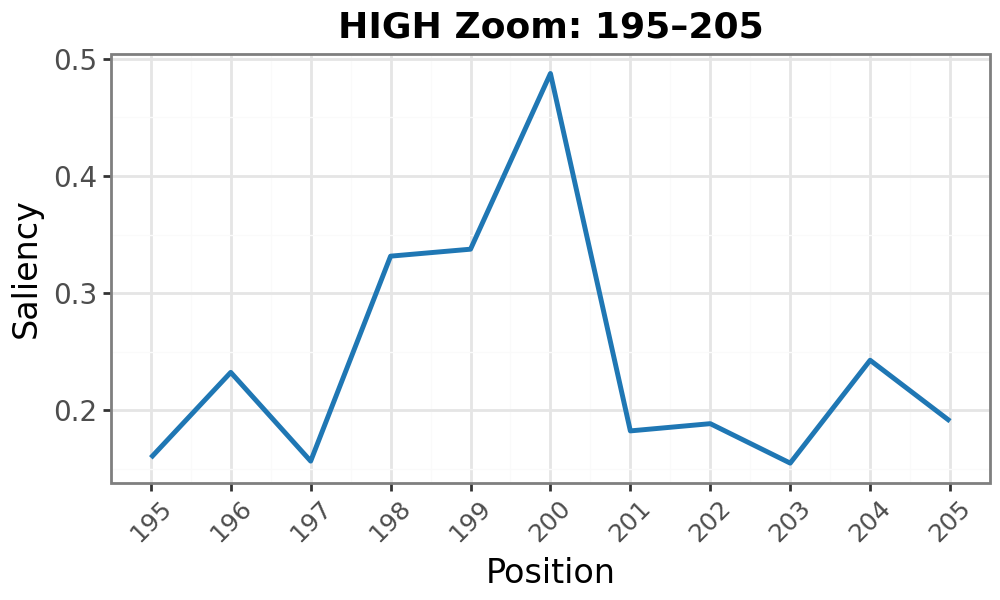

Generated plot: HIGH_5prime


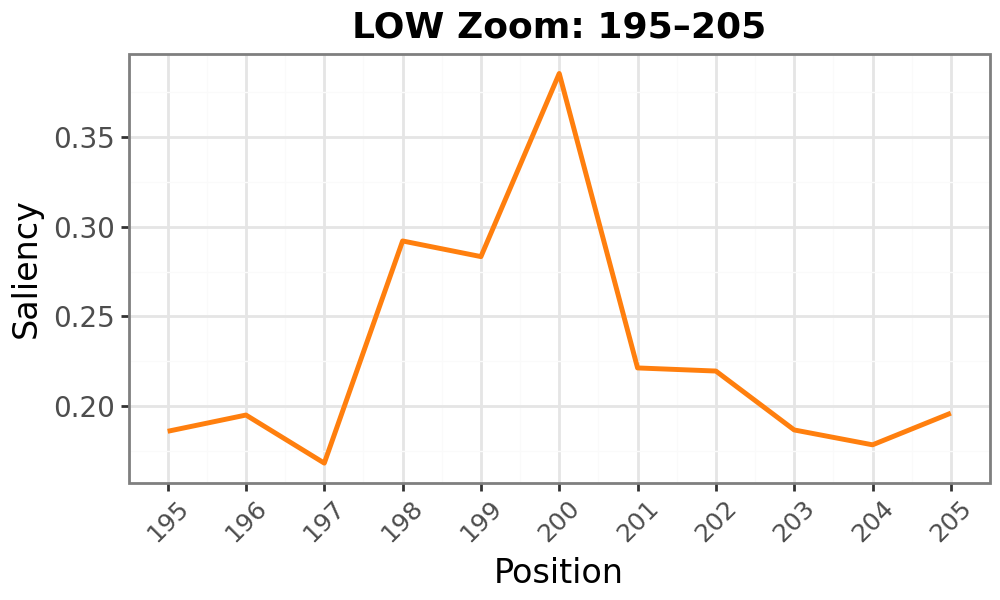

Generated plot: LOW_5prime


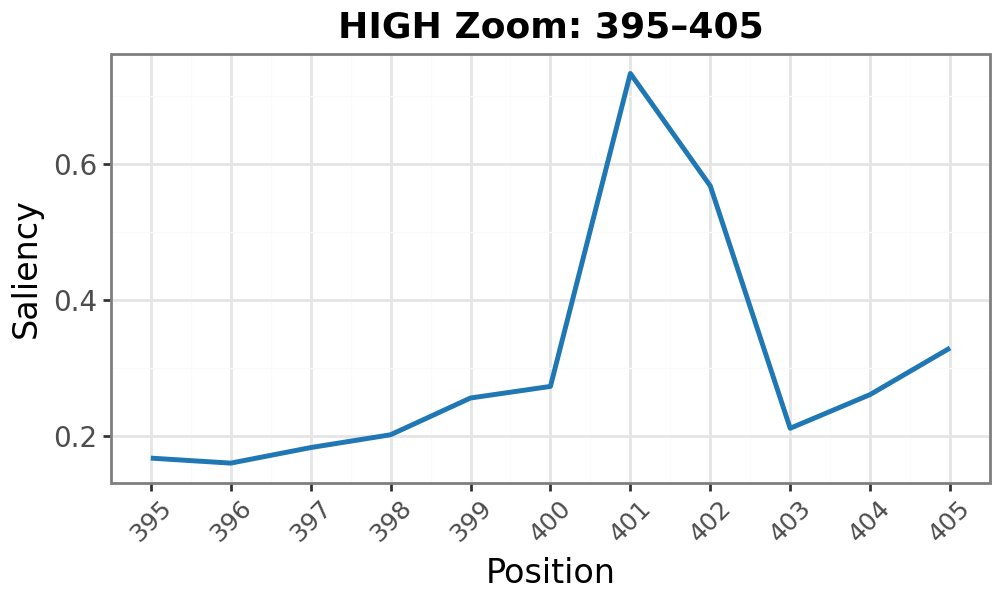

Generated plot: HIGH_3prime


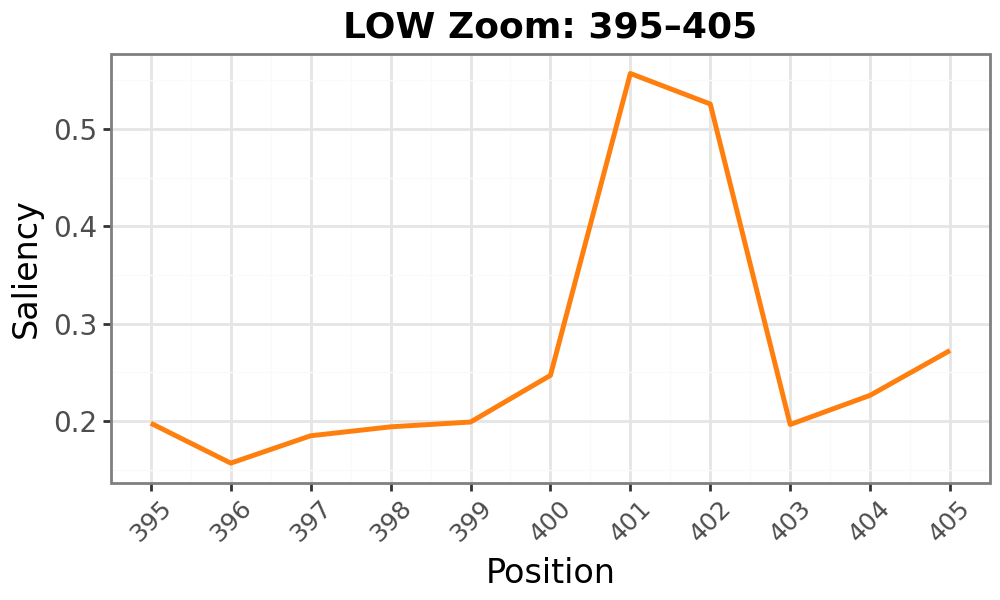

Generated plot: LOW_3prime


In [19]:
from plotnine import *
import pandas as pd

# Define zoom windows
# zoom_windows = {
#     "HIGH_5prime":  (190, 210),
#     "LOW_5prime":   (190, 210),
#     "HIGH_3prime":  (390, 410),
#     "LOW_3prime":   (390, 410),
# }

zoom_windows = {
    "HIGH_5prime":  (195, 205),
    "LOW_5prime":   (195, 205),
    "HIGH_3prime":  (395, 405),
    "LOW_3prime":   (395, 405),
}

plots = {}

for name, (start, end) in zoom_windows.items():
    grp = name.split("_")[0]   # HIGH or LOW
    
    df_zoom = df[(df["Group"] == grp) &
                 (df["pos"] >= start) &
                 (df["pos"] <= end)]
    
    p = (
        ggplot(df_zoom, aes("pos", "saliency"))
        + geom_line(color="#1f77b4" if grp=="HIGH" else "#ff7f0e", size=1.0)
        + scale_x_continuous(
            breaks=list(range(start, end + 1)),    # <-- Exact ticks!
            limits=(start, end)
        )
        + theme_bw()
        + theme(
            figure_size=(5, 3),
            axis_title=element_text(size=12),
            axis_text_x=element_text(size=9, rotation=45),
            axis_text_y=element_text(size=10),
            plot_title=element_text(size=13, weight="bold")
        )
        + labs(
            title=f"{grp} Zoom: {start}–{end}",
            x="Position",
            y="Saliency"
        )
    )
    
    p.show()
    plots[name] = p
    print(f"Generated plot: {name}")


In [8]:
import logomaker
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def make_logo(list_of_seqs, fig_name, title, start, end):
    # Convert all sequences to uppercase
    list_of_seqs = [s.upper() for s in list_of_seqs]

    # Build info matrix
    df_counts = logomaker.alignment_to_matrix(list_of_seqs, to_type='information')

    # Plot
    plt.figure(figsize=(6,2))
    logomaker.Logo(df_counts)

    # Set xticks to actual genomic coordinates
    window_len = end - start
    plt.xticks(
        ticks=np.arange(window_len),
        labels=np.arange(start, end)
    )

    plt.title(title)
    plt.xlabel("Genomic Position")
    plt.tight_layout()
    plt.savefig(f"{sal_dir}/figures/{fig_name}.png")
    plt.show()


Loaded keys: dict_keys(['HIGH_fullSeq', 'LOW_fullSeq', 'HIGH_left', 'LOW_left', 'HIGH_right', 'LOW_right', 'left_range', 'right_range'])


<Figure size 600x200 with 0 Axes>

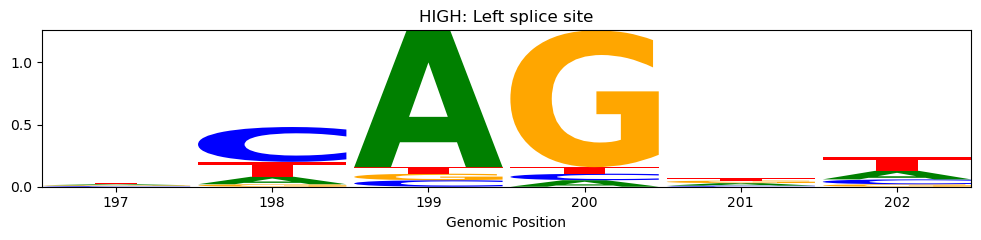

<Figure size 600x200 with 0 Axes>

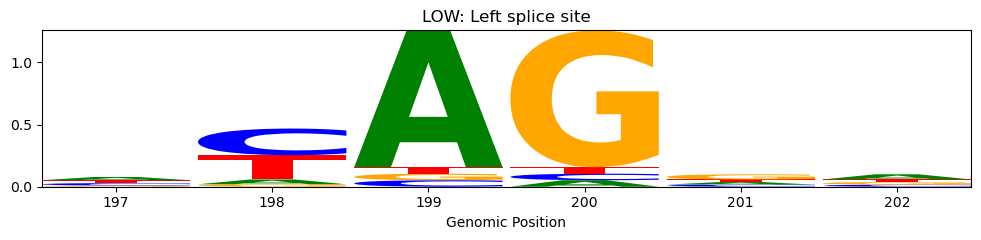

<Figure size 600x200 with 0 Axes>

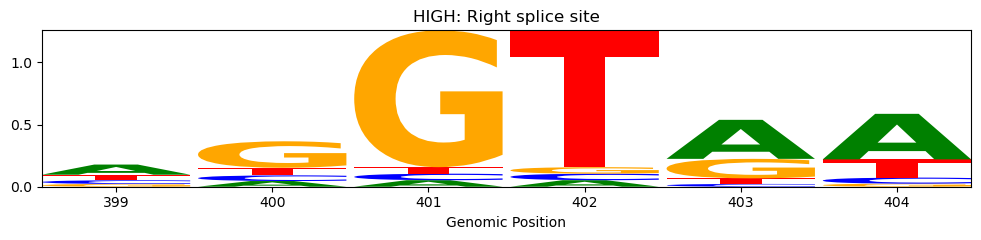

<Figure size 600x200 with 0 Axes>

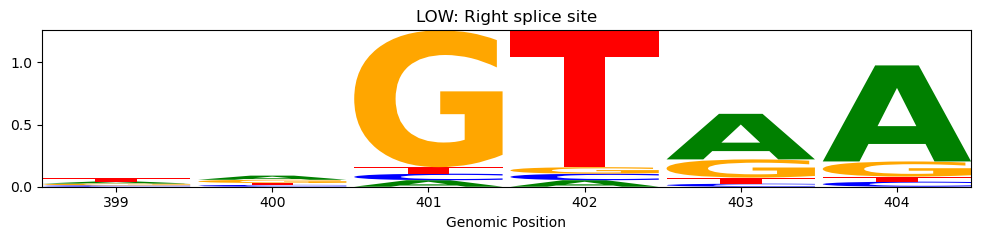

In [ ]:
import pickle

pkl_path = f"{sal_dir}/pickles/motif_windows.pkl"   # <-- replace with your path

with open(pkl_path, "rb") as f:
    motif_data = pickle.load(f)

print("Loaded keys:", motif_data.keys())

left_start, left_end = motif_data["left_range"]
right_start, right_end = motif_data["right_range"]


make_logo(
    motif_data["HIGH_left"],
    fig_name="HIGH_left_logo",
    title="HIGH: Left splice site",
    start=left_start,
    end=left_end
)

make_logo(
    motif_data["LOW_left"],
    fig_name="LOW_left_logo",
    title="LOW: Left splice site",
    start=left_start,
    end=left_end
)

make_logo(
    motif_data["HIGH_right"],
    fig_name="HIGH_right_logo",
    title="HIGH: Right splice site",
    start=right_start,
    end=right_end
)

make_logo(
    motif_data["LOW_right"],
    fig_name="LOW_right_logo",
    title="LOW: Right splice site",
    start=right_start,
    end=right_end
)

In [21]:
import numpy as np
import pandas as pd

def alignment_to_info_matrix(list_of_seqs):
    """
    Build an information content matrix identical to logomaker.alignment_to_matrix(..., to_type='information').
    Returns long-format dataframe suitable for plotnine.
    """

    seqs = [list(s.upper()) for s in list_of_seqs]
    L = len(seqs[0])
    
    df_counts = pd.DataFrame(0, index=range(L), columns=list("ACGT"))

    # Count occurrences
    for s in seqs:
        for i, base in enumerate(s):
            if base in "ACGT":
                df_counts.loc[i, base] += 1
    
    # Convert to frequencies
    df_freq = df_counts.div(df_counts.sum(axis=1), axis=0)

    # Information content: 2 bits - entropy
    entropy = -(df_freq * np.log2(df_freq + 1e-9)).sum(axis=1)
    info_per_pos = 2 - entropy  # DNA alphabet → max 2 bits

    # Multiply frequencies by information content
    df_ic = df_freq.mul(info_per_pos, axis=0)

    # Convert to long format for plotnine
    df_long = (
        df_ic.reset_index()
              .melt(id_vars="index", var_name="base", value_name="height")
              .rename(columns={"index": "pos"})
    )

    return df_long


In [22]:
from plotnine import *
import numpy as np

def make_logo_plotnine(list_of_seqs, fig_name, title, start, end):

    df_long = alignment_to_info_matrix(list_of_seqs)

    window_len = end - start
    df_long["coord"] = df_long["pos"] + start

    # cumulative stack to emulate Logomaker’s ordered stacking
    df_long["order"] = df_long["base"].map({"A":0, "C":1, "G":2, "T":3})
    df_long = df_long.sort_values(["pos", "order"])

    # compute ymin, ymax for stacked bars
    df_long["ymin"] = df_long.groupby("pos")["height"].cumsum() - df_long["height"]
    df_long["ymax"] = df_long.groupby("pos")["height"].cumsum()

    # base colors similar to logomaker defaults
    base_colors = {
        "A": "#1f77b4",
        "C": "#ff7f0e",
        "G": "#2ca02c",
        "T": "#d62728"
    }

    p = (
        ggplot(df_long)
        + geom_rect(
            aes(
                xmin="coord-0.5", xmax="coord+0.5",
                ymin="ymin", ymax="ymax",
                fill="base"
            ),
            color="black", size=0.2
        )
        + scale_fill_manual(values=base_colors)
        + labs(title=title, x="Genomic Position", y="Information (bits)")
        + theme_bw()
        + theme(
            figure_size=(10, 2),
            legend_position="none",
            axis_text_x=element_text(rotation=90, size=6)
        )
        + scale_x_continuous(breaks=np.arange(start, end))
    )

    p.save(f"{sal_dir}/figures/{fig_name}.png", dpi=300)
    return p


/gpfs/commons/home/atalukder/miniconda3/envs/Myjupyterenv/lib/python3.10/site-packages/plotnine/ggplot.py:623: PlotnineWarning: Saving 10 x 2 in image.
/gpfs/commons/home/atalukder/miniconda3/envs/Myjupyterenv/lib/python3.10/site-packages/plotnine/ggplot.py:624: PlotnineWarning: Filename: /gpfs/commons/home/atalukder/Contrastive_Learning/data/extra/contrast_saliency_random/f__2025_11_19__13_37_51//figures/HIGH_left_logo_plotnine.png


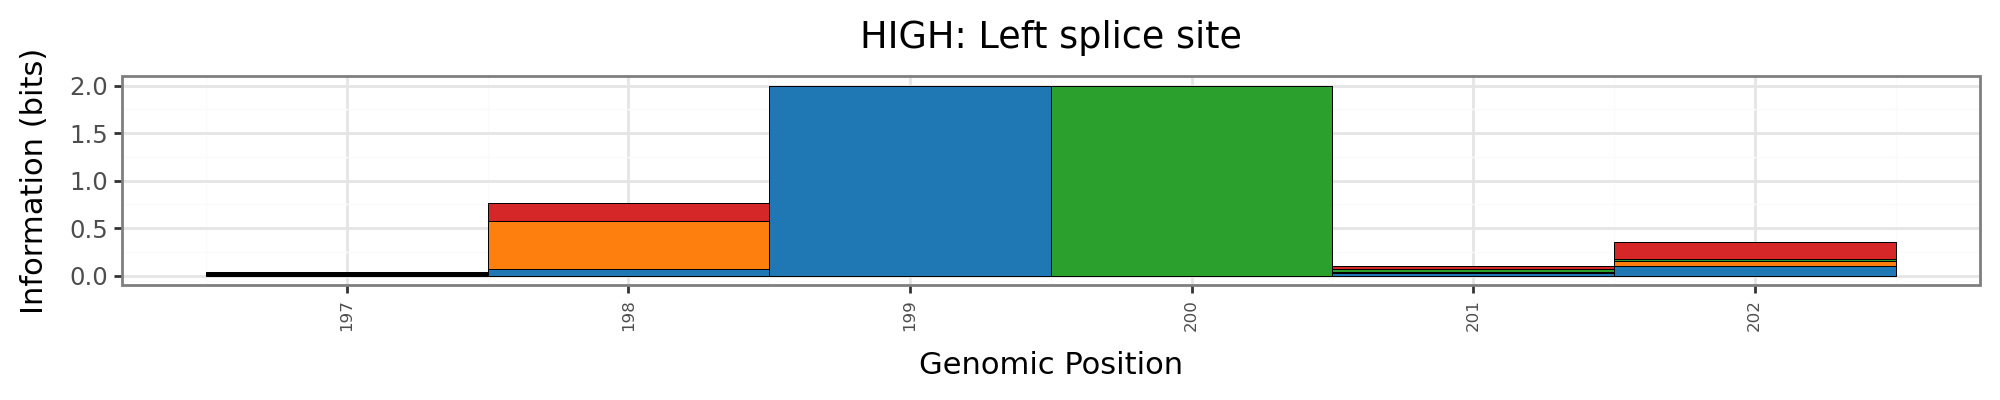

In [23]:
make_logo_plotnine(
    motif_data["HIGH_left"],
    fig_name="HIGH_left_logo_plotnine",
    title="HIGH: Left splice site",
    start=left_start,
    end=left_end
)


In [7]:
raw_pos = np.arange(L)

pos = raw_pos  # no shifting

df = pd.DataFrame({
    "pos": np.concatenate([pos, pos]),
    "saliency": np.concatenate([HIGH, LOW]),
    "Group": ["HIGH"] * L + ["LOW"] * L,
})

df["pos"].min(), df["pos"].max()
df[df["pos"] < 25].head()
# df[df["pos"] < 25].shape
# sorted(df_violin["bin_start"].unique())[:5]

df_violin = df.copy()
df_violin["bin_start"] = (df_violin["pos"] // 25) * 25
sorted(df_violin["bin_start"].unique())[:10]




[np.int64(0),
 np.int64(25),
 np.int64(50),
 np.int64(75),
 np.int64(100),
 np.int64(125),
 np.int64(150),
 np.int64(175),
 np.int64(200),
 np.int64(225)]

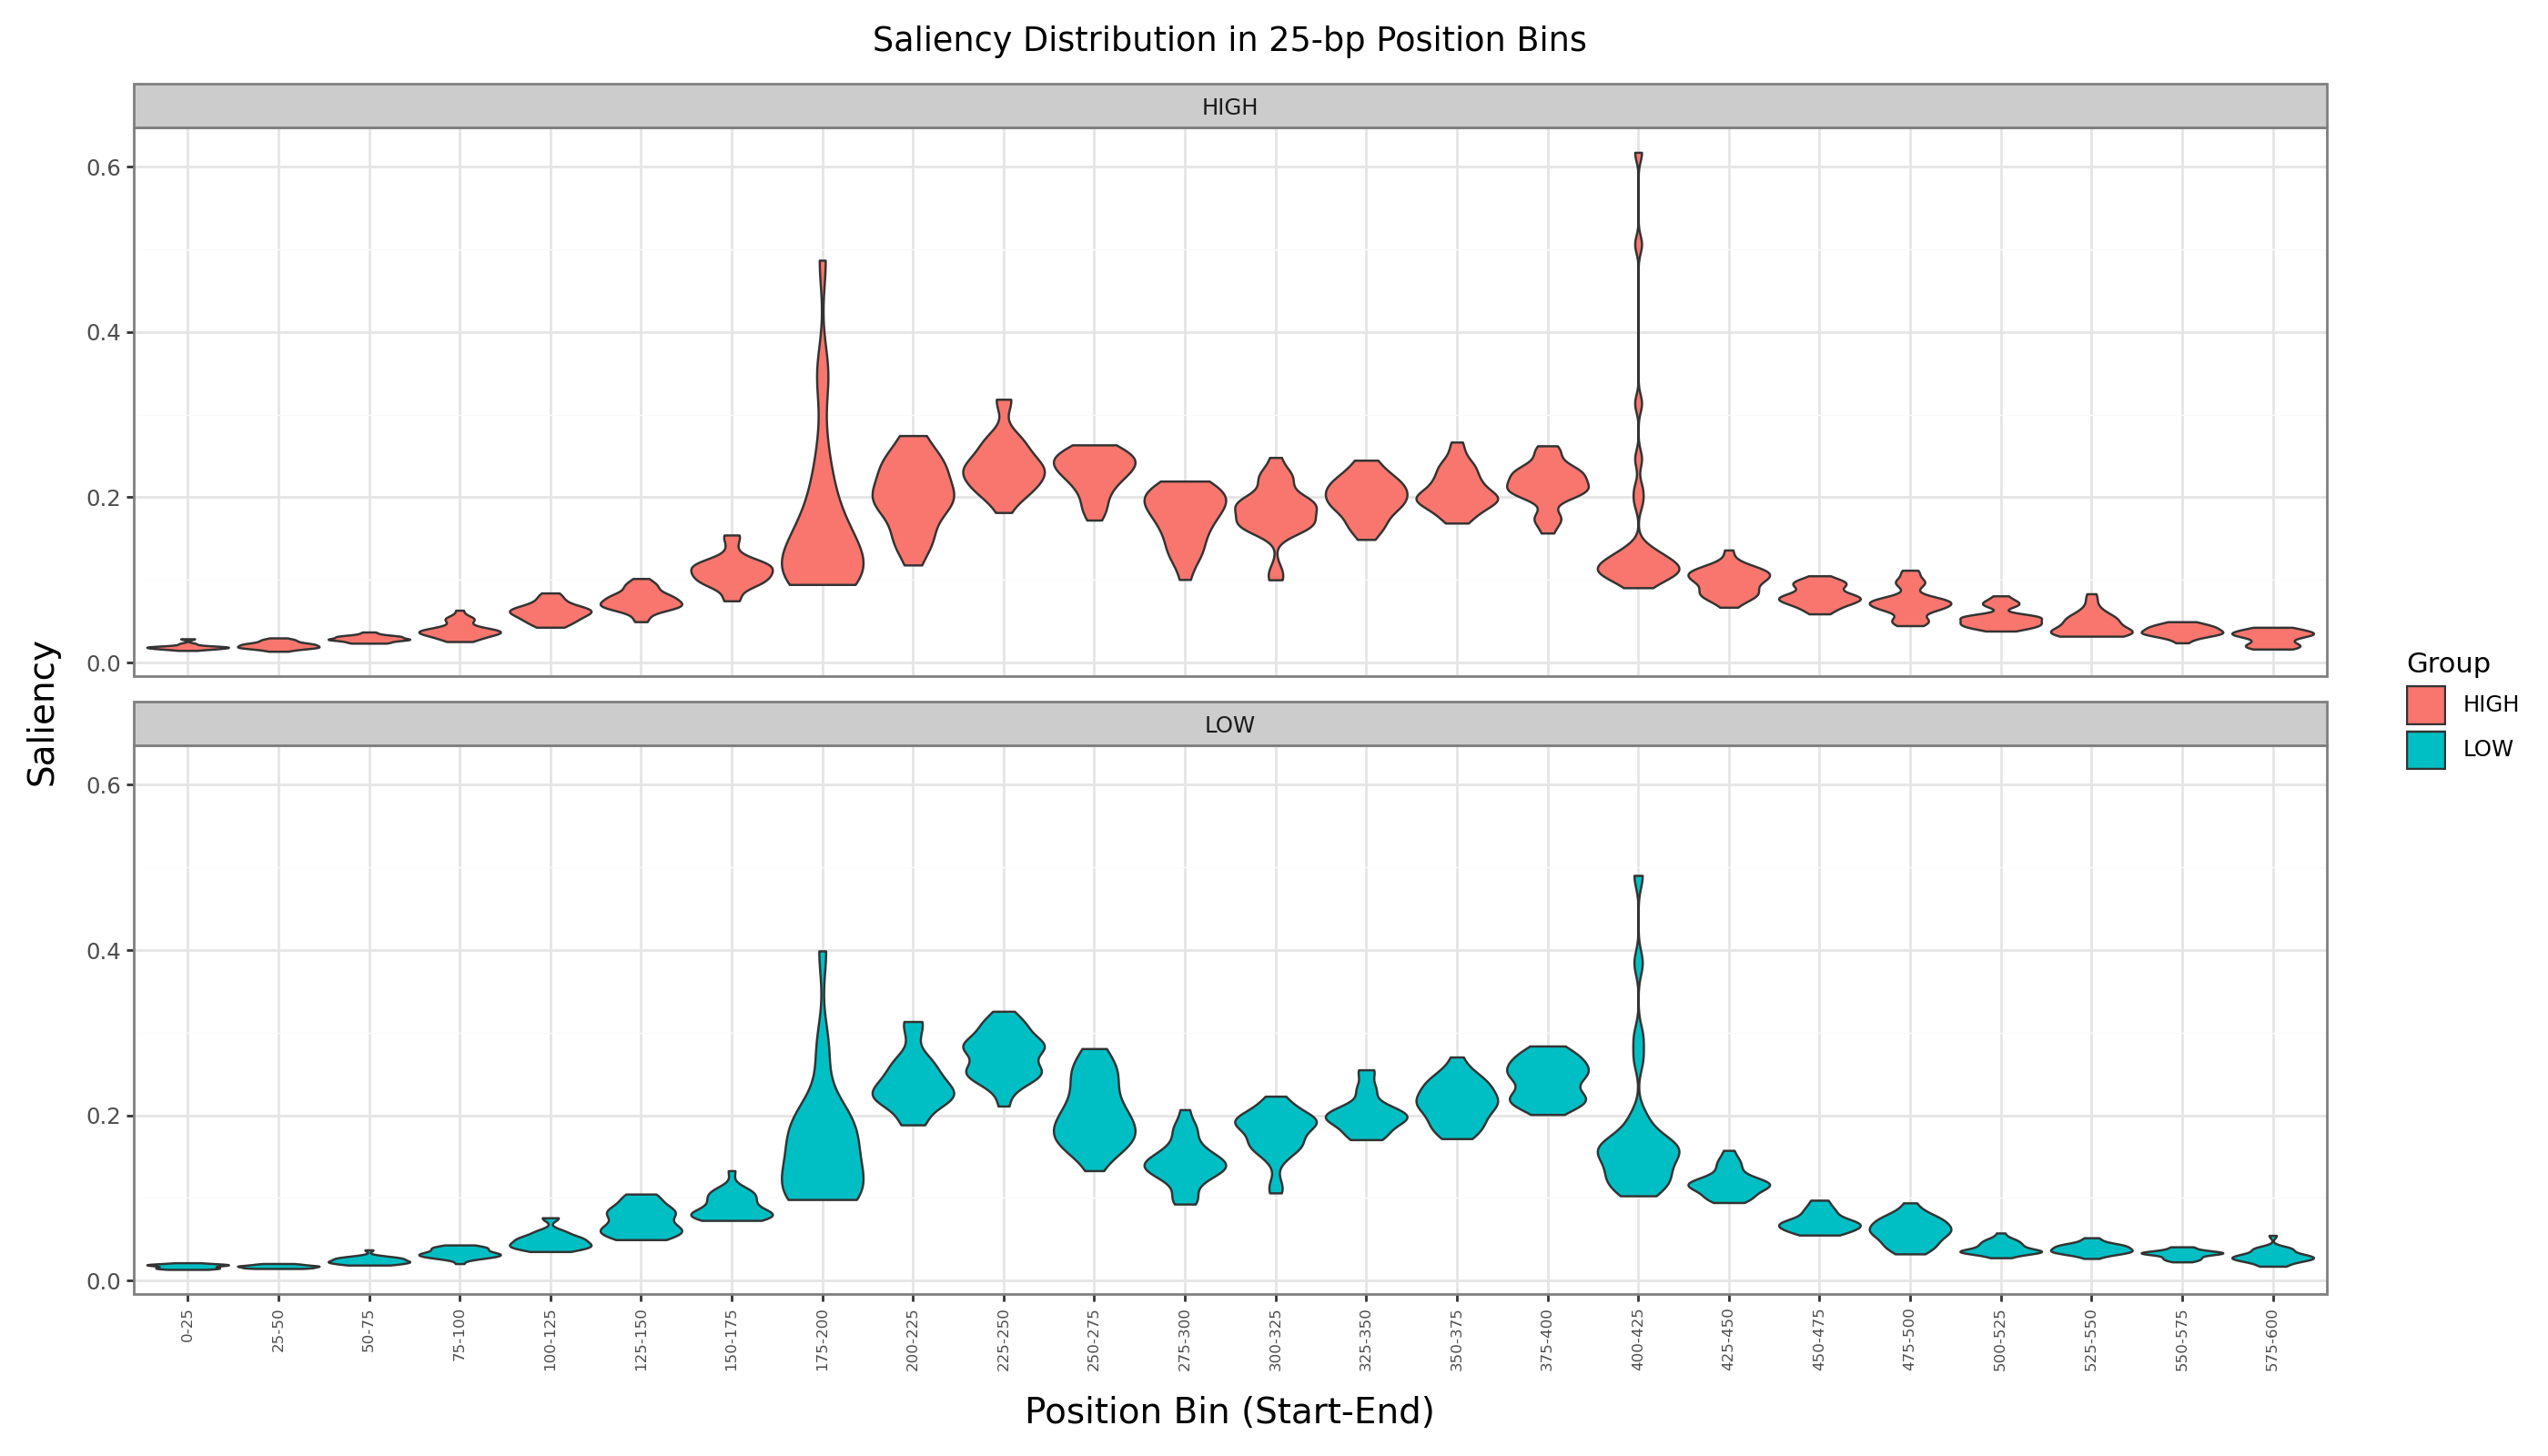

In [10]:
from plotnine import *
import numpy as np
import pandas as pd

# Assume 'df' is defined and has 'pos', 'saliency', and 'Group' columns

BIN_SIZE = 25 # Try 20, 25, or 50 depending on smoothing preference 
df_violin = df.copy() 

# --- MODIFICATION 2: Centering the Bins ---
# Calculate the midpoint of the bin (e.g., 0-25 bin should be labeled 12.5, 
# 25-50 bin should be labeled 37.5) to center the plot.
df_violin["bin_start"] = (df_violin["pos"] // BIN_SIZE) * BIN_SIZE 
df_violin["bin_midpoint"] = df_violin["bin_start"] + (BIN_SIZE / 2)

# Create a clear label for the x-axis
df_violin["bin_label"] = df_violin["bin_start"].astype(str) + "-" + (df_violin["bin_start"] + BIN_SIZE).astype(str)

# Ensure the labels are ordered correctly (not strictly necessary for this plot but good practice)
bin_order = sorted(df_violin["bin_start"].unique())
df_violin["bin_midpoint_ordered"] = pd.Categorical(df_violin["bin_midpoint"], 
                                                   categories=[mid + BIN_SIZE/2 for mid in bin_order], 
                                                   ordered=True)

# Generate xticks for the labels
custom_xticks = [mid + BIN_SIZE/2 for mid in bin_order]
custom_xlabels = [f"{start}-{start+BIN_SIZE}" for start in bin_order]


p2 = ( 
    # Use 'bin_midpoint_ordered' as the X-axis for centering
    ggplot(df_violin, aes("bin_midpoint_ordered", "saliency", fill="Group")) 
      
    + geom_violin(scale="width") 
    
    # --- MODIFICATION 1: Splitting the Groups ---
    + facet_wrap("~ Group", ncol=1) 
    
    + theme_bw() 
    + theme( 
        axis_text_x=element_text(rotation=90, size=6), 
        axis_title=element_text(size=14), 
        figure_size=(14, 8)  # Increase figure height for two rows
    ) 
    
    + labs( 
        title=f"Saliency Distribution in {BIN_SIZE}-bp Position Bins", 
        x="Position Bin (Start-End)", 
        y="Saliency", 
        fill="Group" 
    ) 
    
    # Use scale_x_discrete to ensure labels match the midpoint categories
    + scale_x_discrete(labels=custom_xlabels)
) 

p2.show()

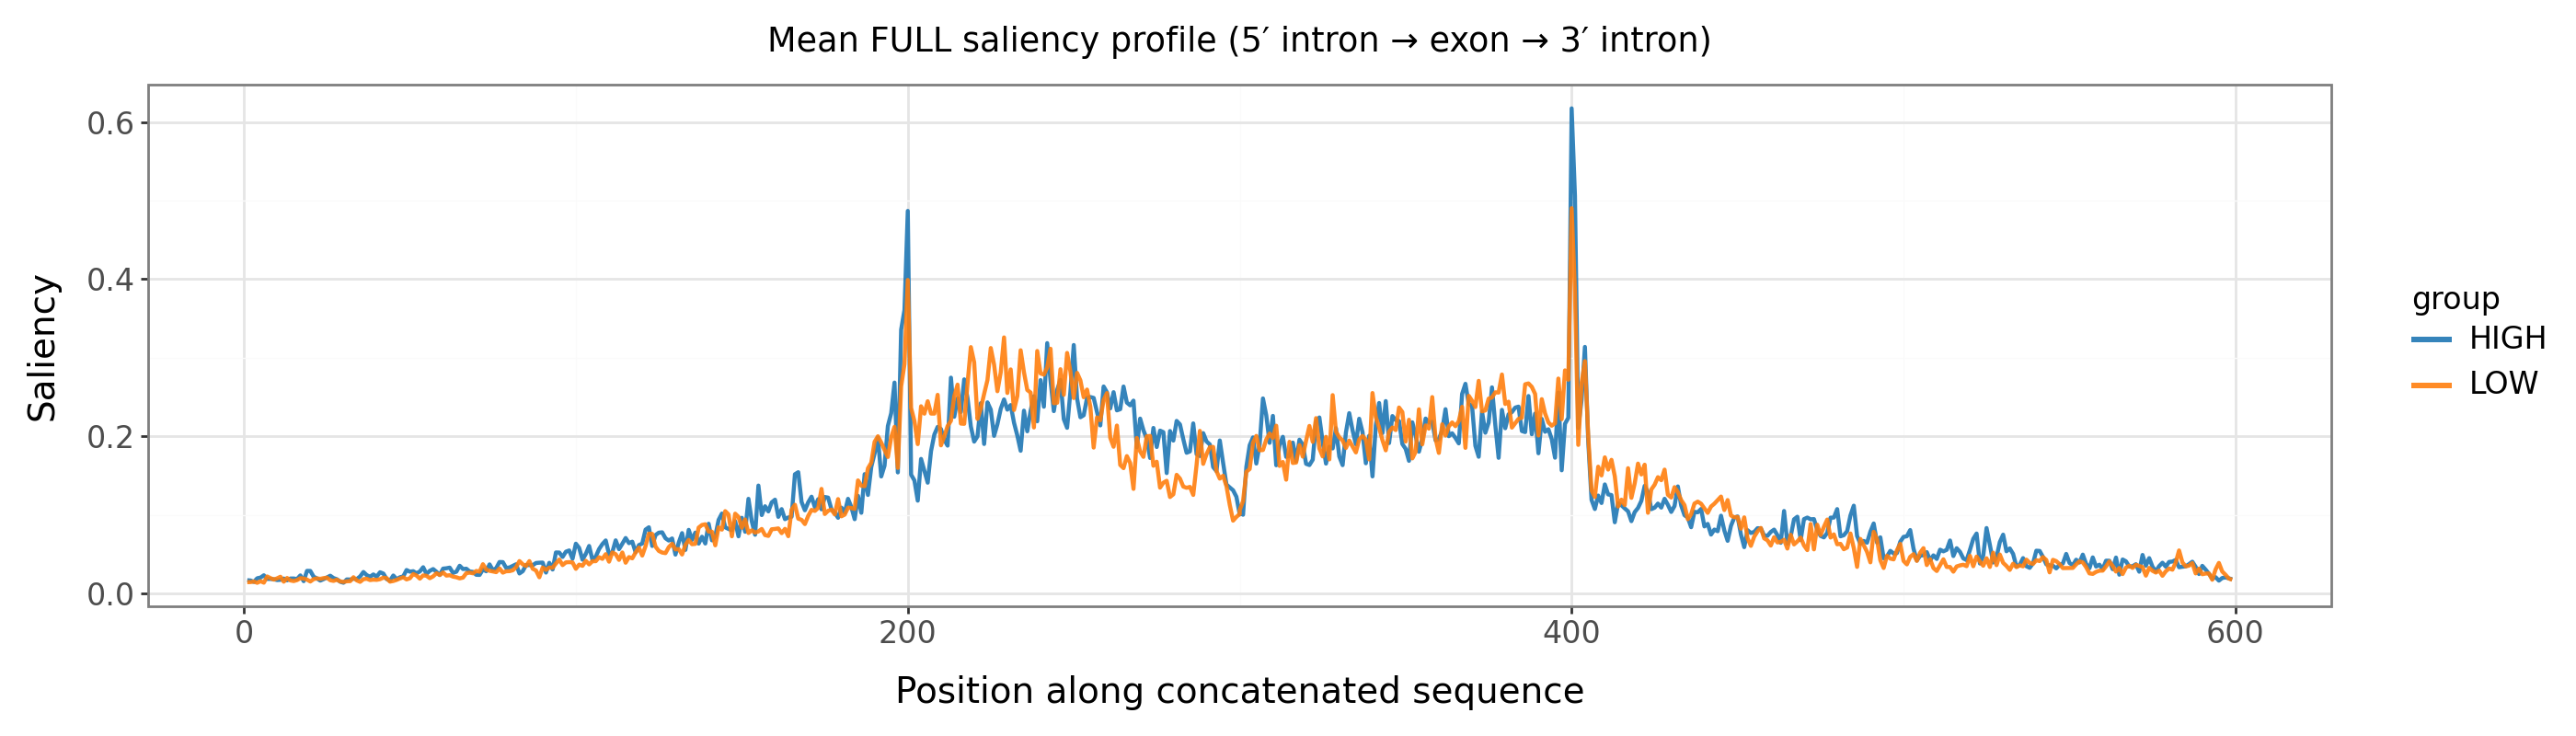

In [25]:
from plotnine import *
import pandas as pd

# df_line must contain columns:
# pos (int), saliency (float), group (HIGH/LOW)

p_line = (
    ggplot(df, aes("pos", "saliency", color="group"))
    + geom_line(size=0.9, alpha=0.9)
    # + geom_vline(xintercept=[five_prime_ss, three_prime_ss],
    #              linetype="dashed", color="gray")
    + scale_color_manual(
        values=["#1f77b4", "#ff7f0e"],   # blue, orange
        name=""
    )
    + theme_bw()
    + theme(
        figure_size=(14, 4),
        axis_title=element_text(size=14),
        axis_text=element_text(size=12),
        legend_title=element_text(size=12),
        legend_text=element_text(size=12),
    )
    + labs(
        title="Mean FULL saliency profile (5′ intron → exon → 3′ intron)",
        x="Position along concatenated sequence",
        y="Saliency"
    )
)

p_line.show()


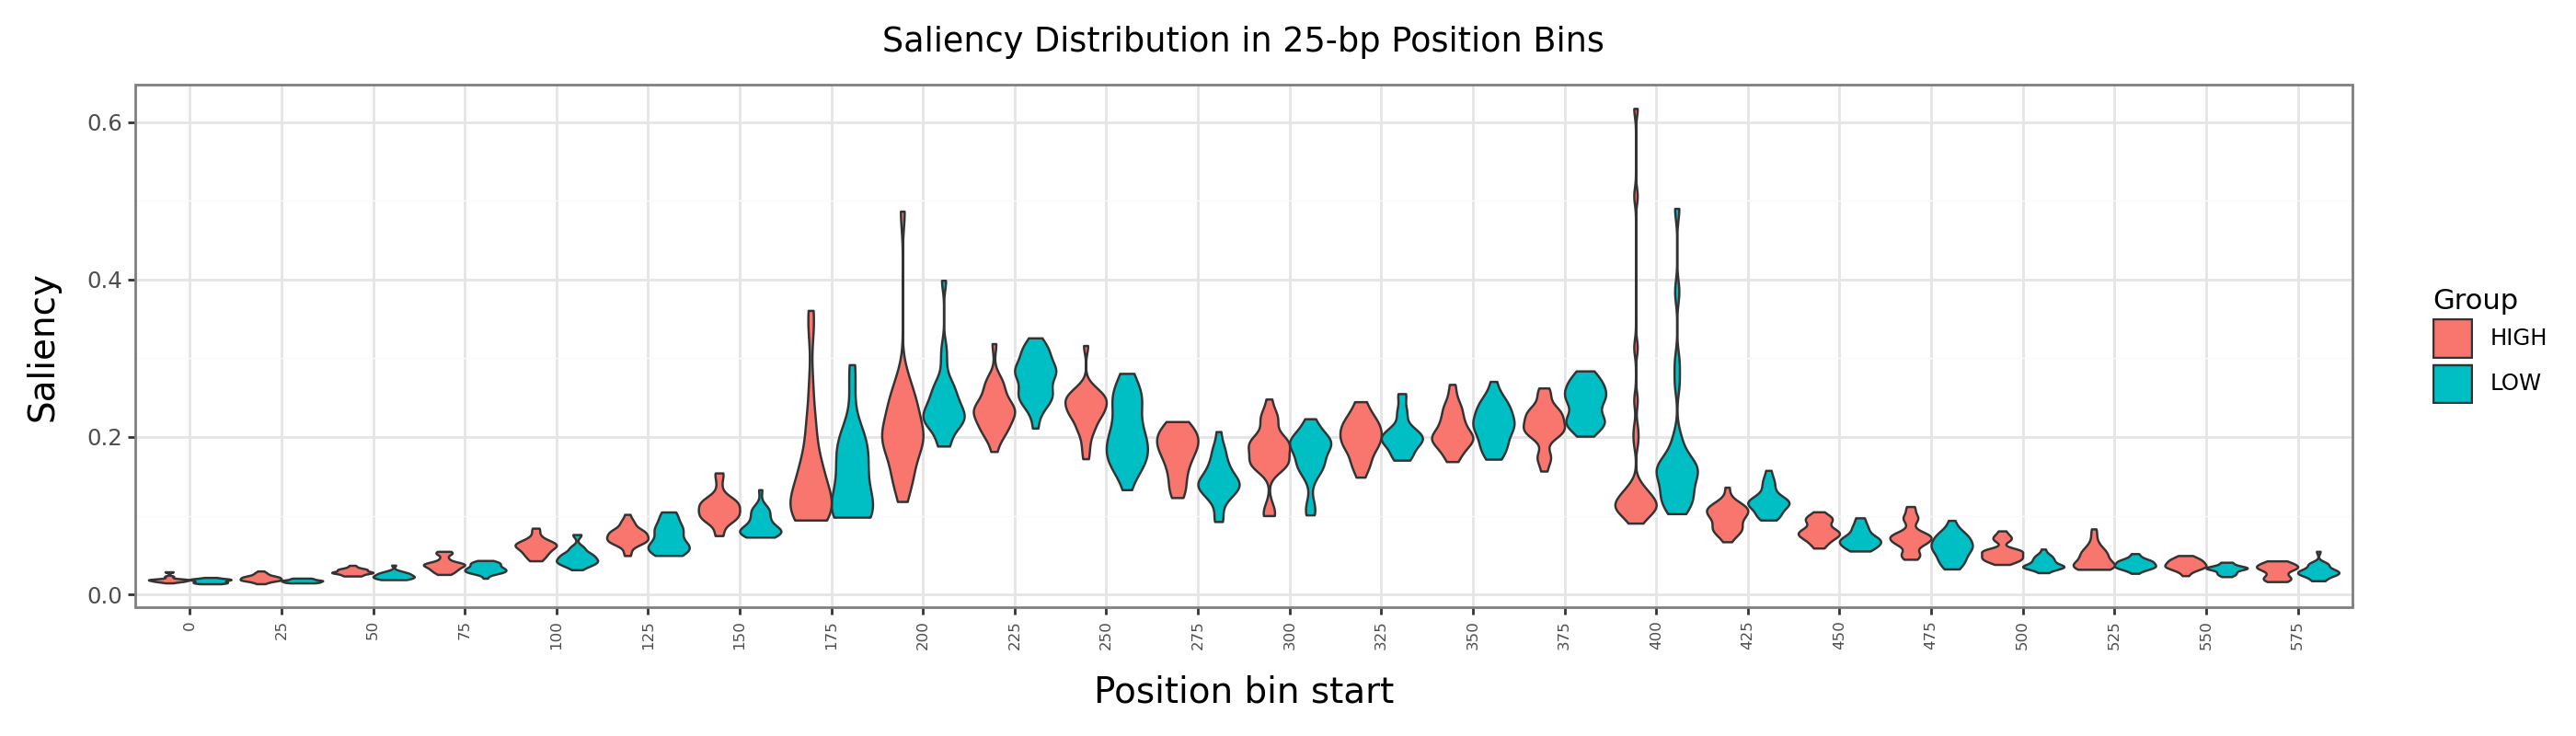

In [84]:
BIN_SIZE = 25 # Try 20, 25, or 50 depending on smoothing preference 
df_violin = df.copy() 
df_violin["bin"] = (df_violin["pos"] // BIN_SIZE) * BIN_SIZE 

p2 = ( ggplot(df_violin, aes("factor(bin)", "saliency", fill="Group")) 
      + geom_violin(scale="width") + theme_bw() 
      + theme( axis_text_x=element_text(rotation=90, size=6), axis_title=element_text(size=14), figure_size=(14, 4) ) 
      + labs( title=f"Saliency Distribution in {BIN_SIZE}-bp Position Bins", x="Position bin start", y="Saliency", fill="Group" ) ) 
p2.show()